In [6]:
from torch import nn , save , load
import torch
import numpy as np
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [7]:
# Checking if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
X = np.load("X.npy", allow_pickle=True)
y = np.load("y.npy", allow_pickle=True)
y.shape


(999,)

In [9]:
X/=255.0
X = torch.tensor(X, dtype=torch.float32)
X.shape

torch.Size([999, 31, 128])

In [10]:
y = torch.tensor(y)
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
class NN_model(nn.Module):
    def __init__(self,input_size,hidden1_size,hidden2_size,hidden3_size,hidden4_size,hidden5_size,output_size):
        super(NN_model,self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden1_size)
        self.fc2 = torch.nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = torch.nn.Linear(hidden2_size, hidden3_size)
        self.fc4 = torch.nn.Linear(hidden3_size, hidden4_size)
        self.fc5 = torch.nn.Linear(hidden4_size, hidden5_size)
        self.fc6 = torch.nn.Linear(hidden5_size, output_size)        

    def forward(self,x):
        out = F.leaky_relu(self.fc1(x))
        out = F.leaky_relu(self.fc2(out))
        out = F.leaky_relu(self.fc3(out))
        out = F.leaky_relu(self.fc4(out))
        out = F.leaky_relu(self.fc5(out))
        
        out = self.fc6(out)
        return out

In [13]:
X_train.shape[1]

31

In [14]:
input_size = X_train.shape[1]*X_train.shape[2]

hidden1_size = 4096
hidden2_size = 2048
hidden3_size = 1024
hidden4_size = 512
hidden5_size = 256

num_classes = 10

In [15]:
# Checking if working correctly or not
model = NN_model(input_size, hidden1_size,hidden2_size,hidden3_size=hidden3_size,hidden4_size=hidden4_size,hidden5_size=hidden5_size, output_size=num_classes).to(device)
print(model)

NN_model(
  (fc1): Linear(in_features=3968, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=2048, bias=True)
  (fc3): Linear(in_features=2048, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=10, bias=True)
)


In [16]:
num_epochs = 60
batch_size = 64
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
print(X_train.shape)
print(y_train.shape)

torch.Size([799, 31, 128])
torch.Size([799])


In [18]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader


train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
n_total_steps = len(train_loader)
train_loss = []
for epoch in range(num_epochs):
    for i, (embeddings,labels) in enumerate(train_loader):
        embeddings = embeddings.to(device)
        labels = labels.to(device)
        embeddings = embeddings.reshape(embeddings.shape[0],-1)
        # Forward pass
        outputs = model(embeddings)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            train_loss.append(loss.item())

        if loss.item() < 0.04:
            break

Epoch [1/60], Step [10/13], Loss: 2.3069
Epoch [2/60], Step [10/13], Loss: 2.1238
Epoch [3/60], Step [10/13], Loss: 1.9903
Epoch [4/60], Step [10/13], Loss: 1.9108
Epoch [5/60], Step [10/13], Loss: 1.2881
Epoch [6/60], Step [10/13], Loss: 1.2475
Epoch [7/60], Step [10/13], Loss: 0.9318
Epoch [8/60], Step [10/13], Loss: 1.1073
Epoch [9/60], Step [10/13], Loss: 0.6426
Epoch [10/60], Step [10/13], Loss: 0.7521
Epoch [11/60], Step [10/13], Loss: 0.5148
Epoch [12/60], Step [10/13], Loss: 1.3622
Epoch [13/60], Step [10/13], Loss: 1.2544
Epoch [14/60], Step [10/13], Loss: 0.8192
Epoch [15/60], Step [10/13], Loss: 0.5811
Epoch [16/60], Step [10/13], Loss: 0.4255
Epoch [17/60], Step [10/13], Loss: 0.2587
Epoch [18/60], Step [10/13], Loss: 0.6699
Epoch [19/60], Step [10/13], Loss: 0.5888
Epoch [20/60], Step [10/13], Loss: 0.8754
Epoch [21/60], Step [10/13], Loss: 0.4974
Epoch [22/60], Step [10/13], Loss: 0.3431
Epoch [23/60], Step [10/13], Loss: 0.5640
Epoch [24/60], Step [10/13], Loss: 0.4149
E

In [20]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
            f"Got {num_correct} from {num_samples} with accuracy"
            f" {float(num_correct) / float(num_samples) * 100:.2f}"
        )

    # model.train()
    
check_accuracy(train_loader, model)

Got 791 from 799 with accuracy 99.00


<Axes: >

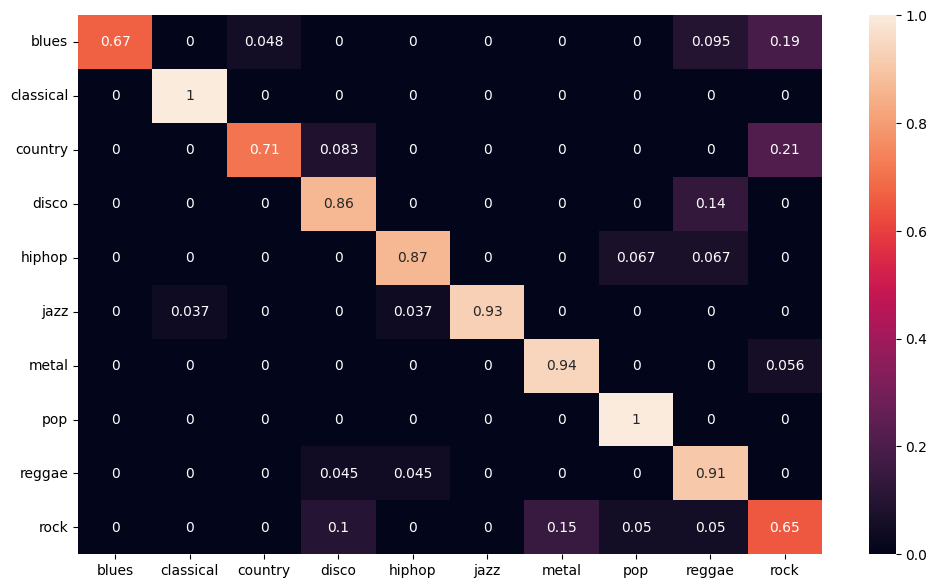

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_pred = []
y_true = []

# iterate over test data
with torch.no_grad():

  for inputs, labels in test_loader:
          inputs = inputs.to(device)
          labels = labels.to(device)
          inputs = inputs.reshape(inputs.shape[0], -1)

          output = model(inputs)

          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          y_pred.extend(output)

          labels = labels.data.cpu().numpy()
          y_true.extend(labels)

  classes = ("blues" , "classical" , "country" , "disco" , "hiphop" , "jazz" , "metal" , "pop" , "reggae" , "rock")

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [22]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
acc = accuracy_score(y_pred,y_true) * 100
report=classification_report(y_true, y_pred,target_names = classes)
print(f"Accuracy = {acc:.2f}%")
print("Classification Report: \n",report)

Accuracy = 84.50%
Classification Report: 
               precision    recall  f1-score   support

       blues       1.00      0.67      0.80        21
   classical       0.92      1.00      0.96        12
     country       0.94      0.71      0.81        24
       disco       0.79      0.86      0.83        22
      hiphop       0.87      0.87      0.87        15
        jazz       1.00      0.93      0.96        27
       metal       0.85      0.94      0.89        18
         pop       0.90      1.00      0.95        19
      reggae       0.74      0.91      0.82        22
        rock       0.57      0.65      0.60        20

    accuracy                           0.84       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.84      0.85       200



In [25]:
mod = torch.save(model,"best.pth")

In [29]:
mod.eval()


NN_model(
  (fc1): Linear(in_features=3968, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=2048, bias=True)
  (fc3): Linear(in_features=2048, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=10, bias=True)
)

In [66]:
from torchvggish import vggish, vggish_input

embedding_model = vggish()
embedding_model.eval()

pred_path = "/home/hassan/Documents/eme/Alghami/Dataset/genres_original/disco/disco.00000.wav"
try:
    example = vggish_input.wavfile_to_examples(pred_path)
    embeddings = embedding_model.forward(example)
    embeddings = embeddings.detach().numpy()
    embeddings/=255.0
    embeddings = embeddings.reshape(1,embeddings.shape[0]*embeddings.shape[1])
    embeddings = torch.tensor(embeddings, dtype=torch.float32).to(device)
except:
    print("Error in extracting embedding")
    exit(1)


out = mod(embeddings)
pred = (torch.max(torch.exp(out), 1)[1]).data.cpu().numpy()
classes = ("blues" , "classical" , "country" , "disco" , "hiphop" , "jazz" , "metal" , "pop" , "reggae" , "rock")
print(classes[pred[0]])

disco
